In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# File paths
DATA_PATH = "/Users/fathhi/Desktop/Interview Tasks/Air_Quality_Analysis/data/"

hourly_path = DATA_PATH + "df_hourly.csv"             
ref_path    = DATA_PATH + "earthsense_reference.csv"  
meta_path   = DATA_PATH + "earthsense_metadata.csv"   
change_path = DATA_PATH + "earthsense_changelog.csv"  


In [3]:
# Load main datasets
df_hourly = pd.read_csv(hourly_path, parse_dates=["timestamp_recorded_utc"])
df_ref    = pd.read_csv(ref_path, parse_dates=["timestamp_utc"])
df_meta   = pd.read_csv(meta_path)
df_change = pd.read_csv(change_path)

print("Hourly dataset shape :", df_hourly.shape)
print("Reference dataset shape:", df_ref.shape)
print("Metadata shape:", df_meta.shape)
print("Changelog shape:", df_change.shape)


Hourly dataset shape : (22560, 19)
Reference dataset shape: (1128, 6)
Metadata shape: (20, 7)
Changelog shape: (3, 4)


Rename overlapping reference columns

We rename overlapping columns (temp_c, rh_pct) so they don’t clash:

In [4]:
df_ref = df_ref.rename(columns={
    "temp_c": "ref_temp_c",
    "rh_pct": "ref_rh_pct"
})

df_ref.head()


,timestamp_utc,ref_no2_ppb,ref_pm25_ugm3,ref_temp_c,ref_rh_pct,ref_no2_ugm3
0,2025-06-15 00:00:00+00:00,26.95,8.20,13.55,77.04,52.70
1,2025-06-15 01:00:00+00:00,24.74,8.96,10.01,83.62,48.98
2,2025-06-15 02:00:00+00:00,24.83,10.43,12.55,84.92,48.73
3,2025-06-15 03:00:00+00:00,21.64,8.79,12.66,91.96,42.45
4,2025-06-15 04:00:00+00:00,21.56,9.96,12.40,87.99,42.33


In [5]:
# Merge df_hourly with reference on timestamp
df_valid = pd.merge(
    df_hourly,
    df_ref,
    left_on="timestamp_recorded_utc",
    right_on="timestamp_utc",
    how="inner"
)

print("Validation dataset shape:", df_valid.shape)
df_valid.head()


Validation dataset shape: (22560, 25)


,sensor_id,timestamp_recorded_utc,no2_ppb,no2_ugm3,pm25_ugm3,temp_c,rh_pct,flag_out_of_range__no2_ppb,flag_out_of_range__no2_ugm3,flag_out_of_range__pm25_ugm3,...,flag_missing__pm25_ugm3,flag_missing__temp_c,flag_missing__rh_pct,flag_missing_any,timestamp_utc,ref_no2_ppb,ref_pm25_ugm3,ref_temp_c,ref_rh_pct,ref_no2_ugm3
0,ZEPHYR_001,2025-06-15 00:00:00+00:00,25.20,49.47,6.67,12.42,77.34,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2025-06-15 00:00:00+00:00,26.95,8.20,13.55,77.04,52.70
1,ZEPHYR_001,2025-06-15 01:00:00+00:00,22.16,43.93,8.62,9.66,81.89,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2025-06-15 01:00:00+00:00,24.74,8.96,10.01,83.62,48.98
2,ZEPHYR_001,2025-06-15 02:00:00+00:00,20.43,40.33,11.01,10.89,85.90,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2025-06-15 02:00:00+00:00,24.83,10.43,12.55,84.92,48.73
3,ZEPHYR_001,2025-06-15 03:00:00+00:00,17.73,34.76,2.65,12.80,98.05,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2025-06-15 03:00:00+00:00,21.64,8.79,12.66,91.96,42.45
4,ZEPHYR_001,2025-06-15 04:00:00+00:00,19.32,37.87,14.30,12.89,91.62,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2025-06-15 04:00:00+00:00,21.56,9.96,12.40,87.99,42.33


In [6]:
df_valid = df_valid.drop(columns=["timestamp_utc"])


In [7]:
df_valid.head(3)

,sensor_id,timestamp_recorded_utc,no2_ppb,no2_ugm3,pm25_ugm3,temp_c,rh_pct,flag_out_of_range__no2_ppb,flag_out_of_range__no2_ugm3,flag_out_of_range__pm25_ugm3,...,flag_missing__no2_ugm3,flag_missing__pm25_ugm3,flag_missing__temp_c,flag_missing__rh_pct,flag_missing_any,ref_no2_ppb,ref_pm25_ugm3,ref_temp_c,ref_rh_pct,ref_no2_ugm3
0,ZEPHYR_001,2025-06-15 00:00:00+00:00,25.20,49.47,6.67,12.42,77.34,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.95,8.20,13.55,77.04,52.70
1,ZEPHYR_001,2025-06-15 01:00:00+00:00,22.16,43.93,8.62,9.66,81.89,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.74,8.96,10.01,83.62,48.98
2,ZEPHYR_001,2025-06-15 02:00:00+00:00,20.43,40.33,11.01,10.89,85.90,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.83,10.43,12.55,84.92,48.73


In [8]:
print("Shape:", df_valid.shape)
df_valid.info()


Shape: (22560, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22560 entries, 0 to 22559
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   sensor_id                     22560 non-null  object             
 1   timestamp_recorded_utc        22560 non-null  datetime64[ns, UTC]
 2   no2_ppb                       22198 non-null  float64            
 3   no2_ugm3                      22198 non-null  float64            
 4   pm25_ugm3                     22198 non-null  float64            
 5   temp_c                        22559 non-null  float64            
 6   rh_pct                        22559 non-null  float64            
 7   flag_out_of_range__no2_ppb    22559 non-null  float64            
 8   flag_out_of_range__no2_ugm3   22559 non-null  float64            
 9   flag_out_of_range__pm25_ugm3  22559 non-null  float64            
 10  flag_out_of_ran

In [9]:
df_valid.isna().sum()


sensor_id                         0
timestamp_recorded_utc            0
no2_ppb                         362
no2_ugm3                        362
pm25_ugm3                       362
temp_c                            1
rh_pct                            1
flag_out_of_range__no2_ppb        1
flag_out_of_range__no2_ugm3       1
flag_out_of_range__pm25_ugm3      1
flag_out_of_range__rh_pct         1
flag_out_of_range__temp_c         1
flag_outlier_any                  1
flag_missing__no2_ppb             1
flag_missing__no2_ugm3            1
flag_missing__pm25_ugm3           1
flag_missing__temp_c              1
flag_missing__rh_pct              1
flag_missing_any                  1
ref_no2_ppb                       0
ref_pm25_ugm3                     0
ref_temp_c                        0
ref_rh_pct                        0
ref_no2_ugm3                      0
dtype: int64

In [10]:
# Save cleaned, resampled dataset to CSV
output_path = "/Users/fathhi/Desktop/Interview Tasks/Air_Quality_Analysis/data/df_valid.csv"   

df_valid.to_csv(output_path, index=False)

print(f"Final dataset saved to: {output_path}")

Final dataset saved to: /Users/fathhi/Desktop/Interview Tasks/Air_Quality_Analysis/data/df_valid.csv


In [10]:
df_valid.groupby("sensor_id").size()


sensor_id
ZEPHYR_001    1128
ZEPHYR_002    1128
ZEPHYR_003    1128
ZEPHYR_004    1128
ZEPHYR_005    1128
ZEPHYR_006    1128
ZEPHYR_007    1128
ZEPHYR_008    1128
ZEPHYR_009    1128
ZEPHYR_010    1128
ZEPHYR_011    1128
ZEPHYR_012    1128
ZEPHYR_013    1128
ZEPHYR_014    1128
ZEPHYR_015    1128
ZEPHYR_016    1128
ZEPHYR_017    1128
ZEPHYR_018    1128
ZEPHYR_019    1128
ZEPHYR_020    1128
dtype: int64

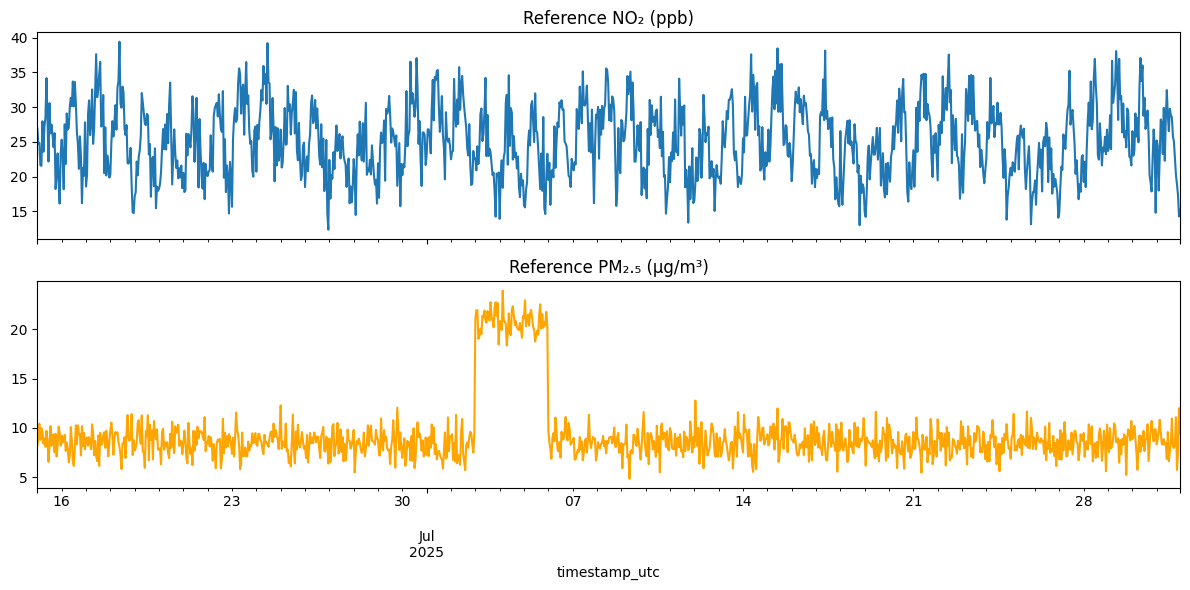

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12,6), sharex=True)

df_ref.plot(x="timestamp_utc", y="ref_no2_ppb", ax=ax[0], legend=False)
ax[0].set_title("Reference NO₂ (ppb)")

df_ref.plot(x="timestamp_utc", y="ref_pm25_ugm3", ax=ax[1], legend=False, color="orange")
ax[1].set_title("Reference PM₂.₅ (µg/m³)")

plt.tight_layout()
plt.show()


In [13]:
def compute_stats(sensor_values, ref_values):
    """Return correlation (R²), bias, and RMSE between sensor and reference."""
    mask = ~(sensor_values.isna() | ref_values.isna())
    s = sensor_values[mask]
    r = ref_values[mask]
    
    if len(s) == 0:
        return np.nan, np.nan, np.nan
    
    corr = np.corrcoef(s, r)[0, 1] if len(s) > 1 else np.nan
    r2 = corr**2 if not np.isnan(corr) else np.nan
    bias = (s - r).mean()
    rmse = np.sqrt(((s - r) ** 2).mean())
    
    return r2, bias, rmse

results = []

for sensor, group in df_valid.groupby("sensor_id"):
    # NO2
    r2_no2, bias_no2, rmse_no2 = compute_stats(group["no2_ppb"], group["ref_no2_ppb"])
    
    # PM2.5
    r2_pm25, bias_pm25, rmse_pm25 = compute_stats(group["pm25_ugm3"], group["ref_pm25_ugm3"])
    
    results.append({
        "sensor_id": sensor,
        "NO2_R2": r2_no2,
        "NO2_Bias": bias_no2,
        "NO2_RMSE": rmse_no2,
        "PM25_R2": r2_pm25,
        "PM25_Bias": bias_pm25,
        "PM25_RMSE": rmse_pm25
    })

df_stats = pd.DataFrame(results).sort_values("NO2_R2", ascending=False)
df_stats.round(3)


,sensor_id,NO2_R2,NO2_Bias,NO2_RMSE,PM25_R2,PM25_Bias,PM25_RMSE
5,ZEPHYR_006,0.799,-2.016,3.276,0.699,-0.103,2.157
15,ZEPHYR_016,0.790,-2.043,3.309,0.751,-1.047,2.115
13,ZEPHYR_014,0.788,0.092,2.626,0.756,-0.036,1.869
2,ZEPHYR_003,0.773,-1.796,3.232,0.707,-0.149,2.112
1,ZEPHYR_002,0.771,-1.969,3.433,0.772,-1.086,2.078
16,ZEPHYR_017,0.754,0.006,2.867,0.751,-0.044,1.827
9,ZEPHYR_010,0.752,8.092,8.589,0.768,2.936,3.441
11,ZEPHYR_012,0.750,8.045,8.584,0.764,2.929,3.446
19,ZEPHYR_020,0.743,7.986,8.504,0.752,3.013,3.546
7,ZEPHYR_008,0.685,9.808,10.443,0.763,2.907,3.441


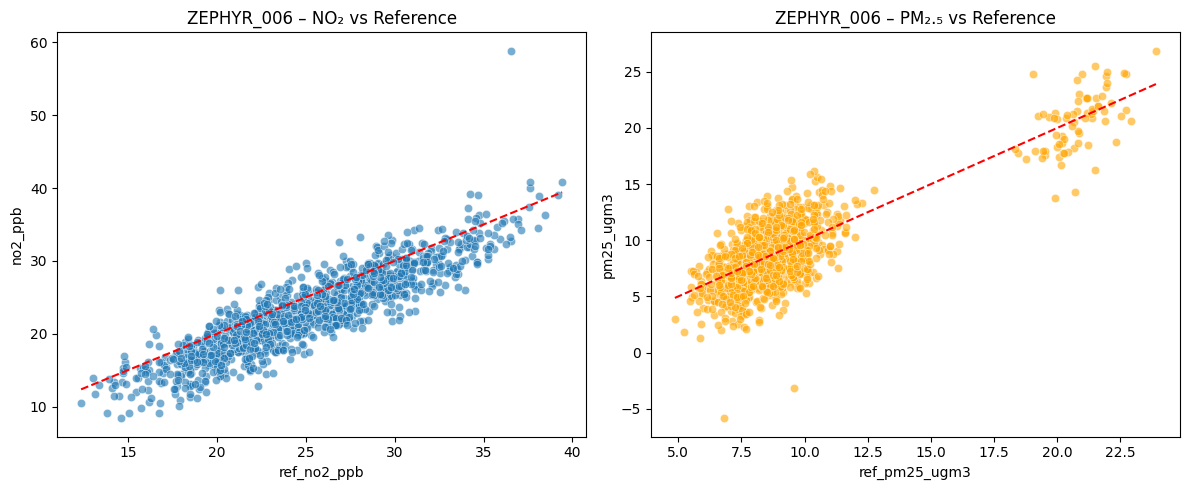

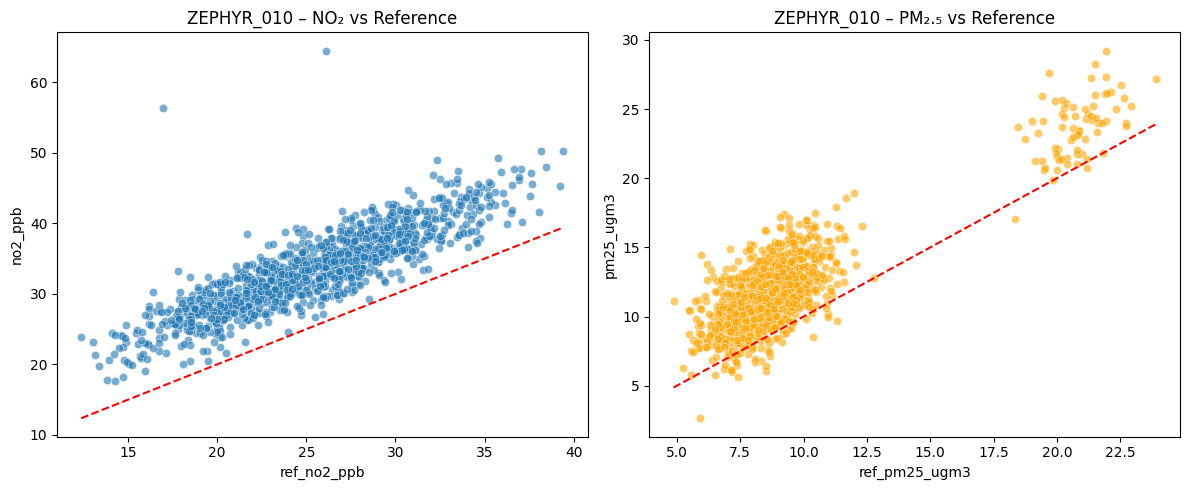

In [14]:


def scatter_vs_ref(sensor_id):
    group = df_valid[df_valid["sensor_id"] == sensor_id]
    
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    # NO₂ scatter
    sns.scatterplot(x="ref_no2_ppb", y="no2_ppb", data=group, ax=ax[0], alpha=0.6)
    ax[0].plot([group["ref_no2_ppb"].min(), group["ref_no2_ppb"].max()],
               [group["ref_no2_ppb"].min(), group["ref_no2_ppb"].max()],
               "r--")
    ax[0].set_title(f"{sensor_id} – NO₂ vs Reference")
    
    # PM₂.₅ scatter
    sns.scatterplot(x="ref_pm25_ugm3", y="pm25_ugm3", data=group, ax=ax[1], alpha=0.6, color="orange")
    ax[1].plot([group["ref_pm25_ugm3"].min(), group["ref_pm25_ugm3"].max()],
               [group["ref_pm25_ugm3"].min(), group["ref_pm25_ugm3"].max()],
               "r--")
    ax[1].set_title(f"{sensor_id} – PM₂.₅ vs Reference")
    
    plt.tight_layout()
    plt.show()

# Example
scatter_vs_ref("ZEPHYR_006")
scatter_vs_ref("ZEPHYR_010")


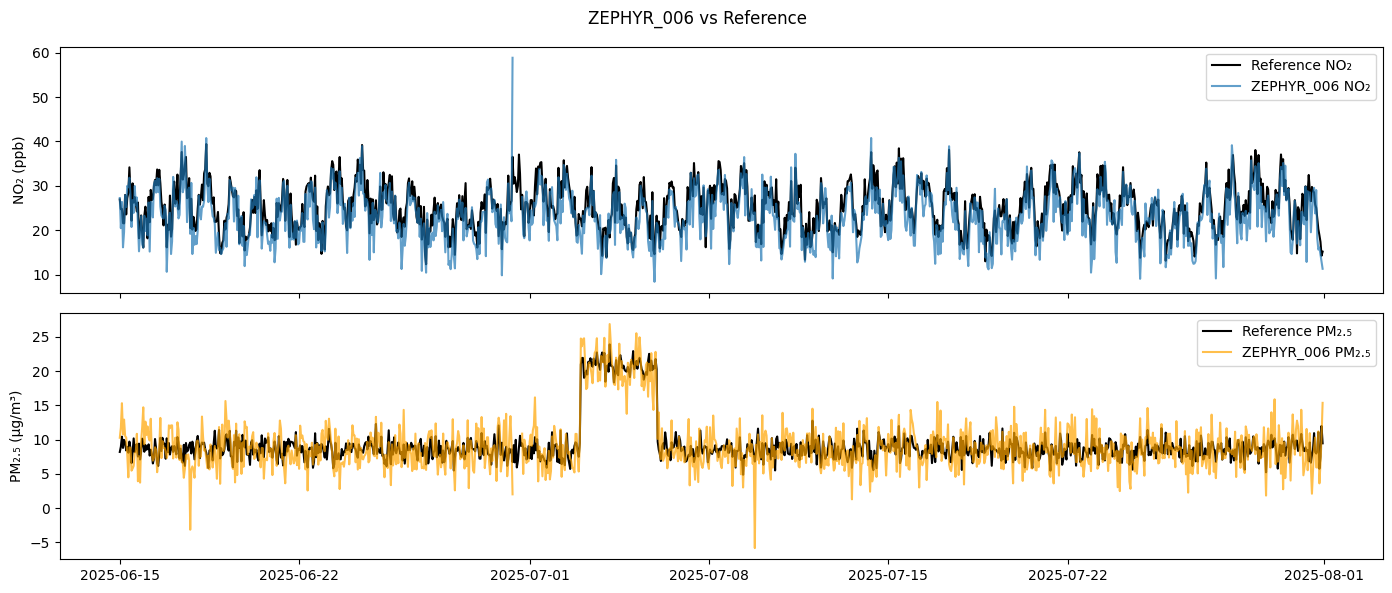

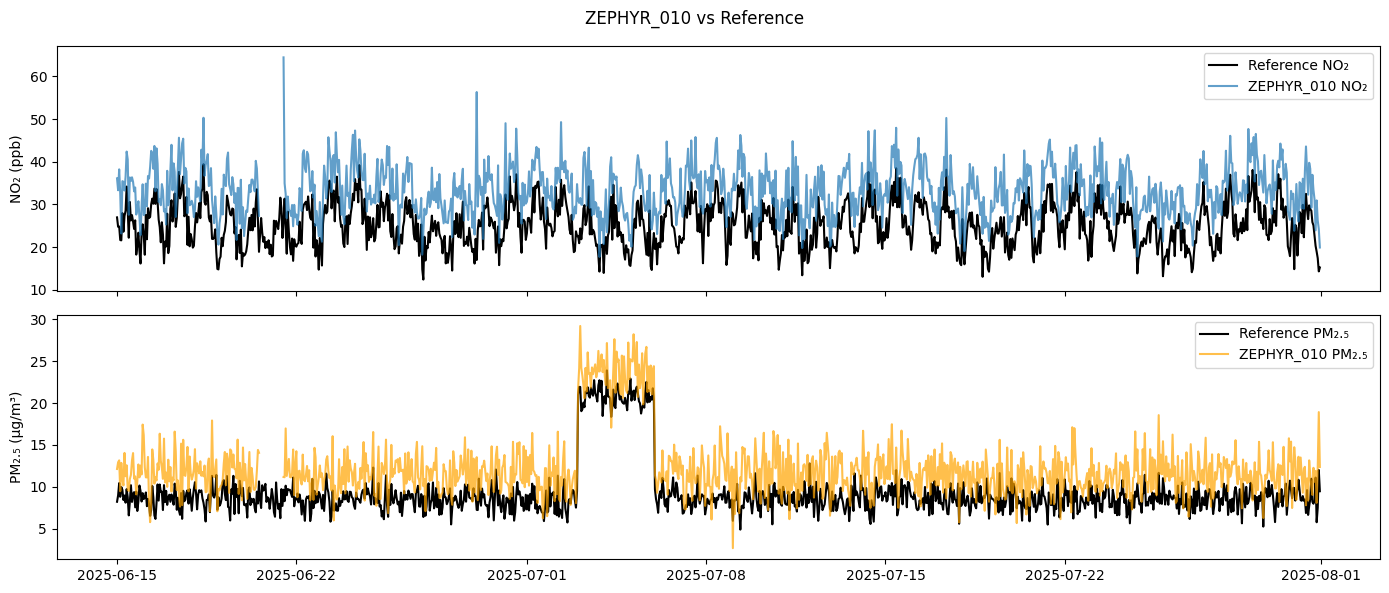

In [15]:
def timeseries_vs_ref(sensor_id):
    group = df_valid[df_valid["sensor_id"] == sensor_id]
    
    fig, ax = plt.subplots(2, 1, figsize=(14,6), sharex=True)
    
    # NO₂
    ax[0].plot(group["timestamp_recorded_utc"], group["ref_no2_ppb"], label="Reference NO₂", color="black")
    ax[0].plot(group["timestamp_recorded_utc"], group["no2_ppb"], label=f"{sensor_id} NO₂", alpha=0.7)
    ax[0].legend()
    ax[0].set_ylabel("NO₂ (ppb)")
    
    # PM₂.₅
    ax[1].plot(group["timestamp_recorded_utc"], group["ref_pm25_ugm3"], label="Reference PM₂.₅", color="black")
    ax[1].plot(group["timestamp_recorded_utc"], group["pm25_ugm3"], label=f"{sensor_id} PM₂.₅", alpha=0.7, color="orange")
    ax[1].legend()
    ax[1].set_ylabel("PM₂.₅ (µg/m³)")
    
    plt.suptitle(f"{sensor_id} vs Reference")
    plt.tight_layout()
    plt.show()

# Example
timeseries_vs_ref("ZEPHYR_006")
timeseries_vs_ref("ZEPHYR_010")


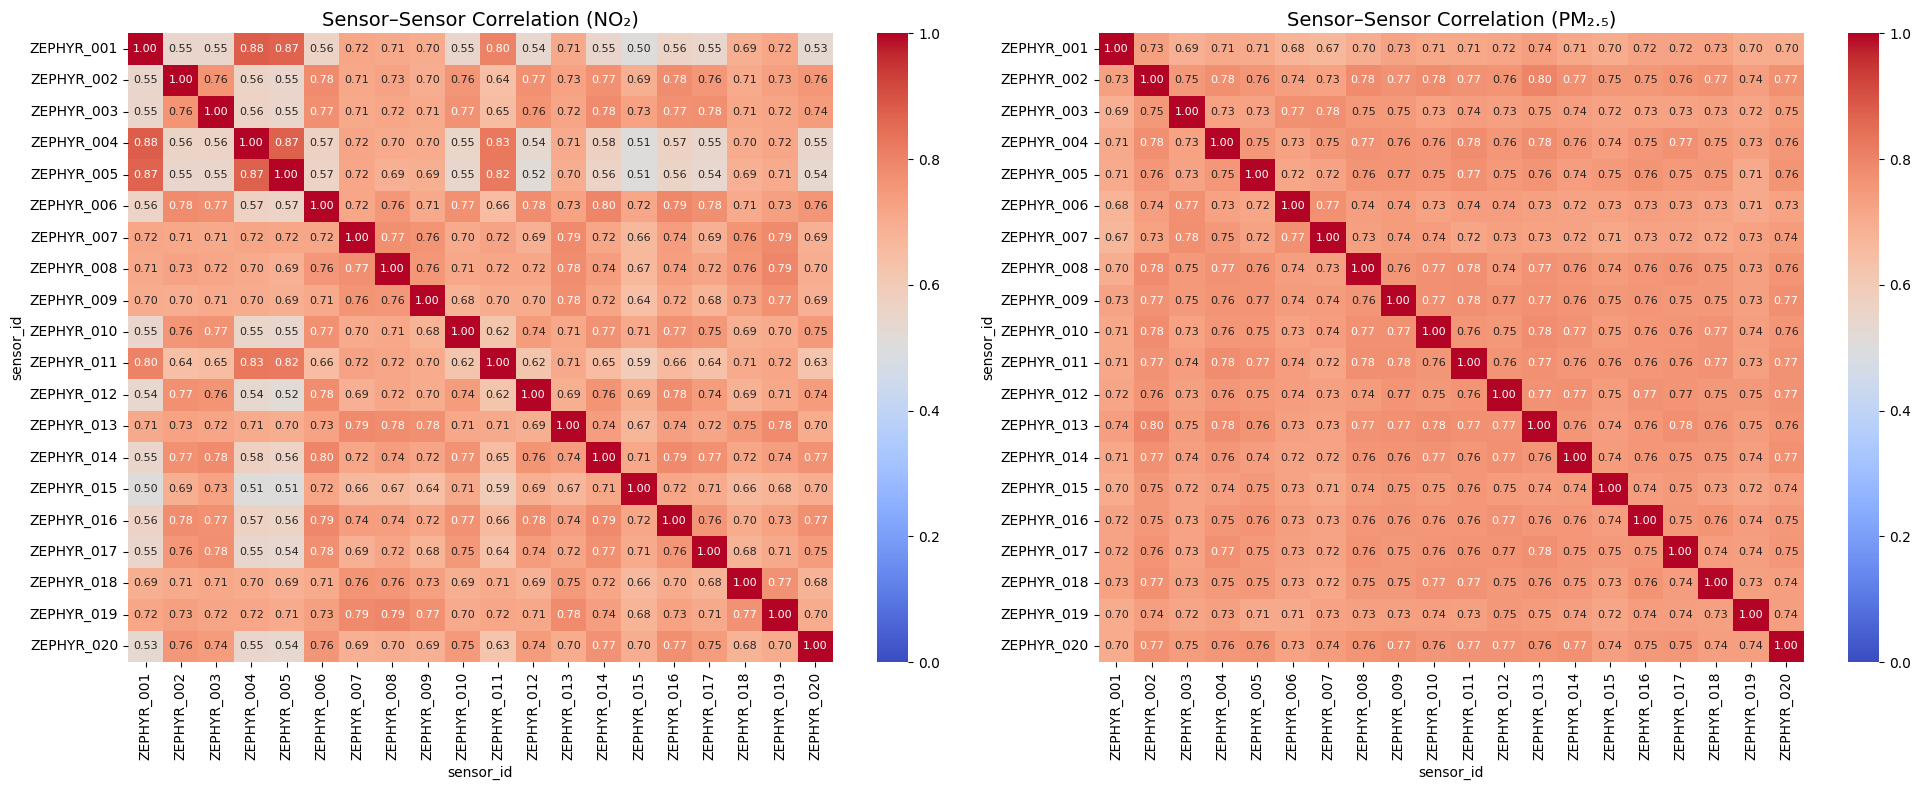

In [16]:
# --- Wide format for correlation ---
no2_wide = df_valid.pivot(index="timestamp_recorded_utc", columns="sensor_id", values="no2_ppb")
pm25_wide = df_valid.pivot(index="timestamp_recorded_utc", columns="sensor_id", values="pm25_ugm3")

# Correlation matrices
corr_no2 = no2_wide.corr()
corr_pm25 = pm25_wide.corr()

# --- Plot heatmaps ---
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# NO2 heatmap
sns.heatmap(
    corr_no2, 
    cmap="coolwarm", vmin=0, vmax=1, 
    annot=True, fmt=".2f", 
    annot_kws={"size":8},
    ax=ax[0], cbar=True
)
ax[0].set_title("Sensor–Sensor Correlation (NO₂)", fontsize=14)

# PM2.5 heatmap
sns.heatmap(
    corr_pm25, 
    cmap="coolwarm", vmin=0, vmax=1, 
    annot=True, fmt=".2f", 
    annot_kws={"size":8},
    ax=ax[1], cbar=True
)
ax[1].set_title("Sensor–Sensor Correlation (PM₂.₅)", fontsize=14)

plt.tight_layout()
plt.show()

In [22]:
# Make firmware date timezone-aware (UTC)
firmware_date = pd.to_datetime("2025-07-10").tz_localize("UTC")


In [23]:


def check_step_change(sensor_id):
    group = df_valid[df_valid["sensor_id"] == sensor_id]
    before = group[group["timestamp_recorded_utc"] < firmware_date]
    after = group[group["timestamp_recorded_utc"] >= firmware_date]
    
    bias_before = (before["no2_ppb"] - before["ref_no2_ppb"]).mean()
    bias_after  = (after["no2_ppb"] - after["ref_no2_ppb"]).mean()
    
    print(f"{sensor_id} – Bias before: {bias_before:.2f}, after: {bias_after:.2f}")

check_step_change("ZEPHYR_010")
check_step_change("ZEPHYR_012")
check_step_change("ZEPHYR_020")


ZEPHYR_010 – Bias before: 8.12, after: 8.06
ZEPHYR_012 – Bias before: 8.19, after: 7.87
ZEPHYR_020 – Bias before: 8.11, after: 7.84


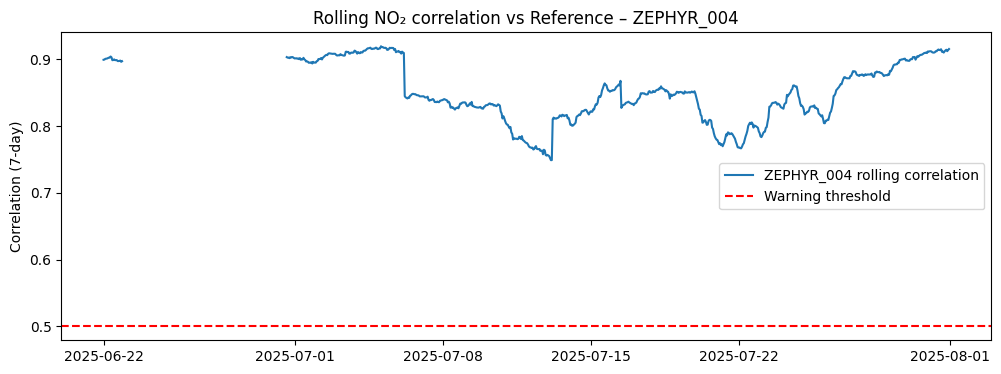

In [20]:
def rolling_corr(sensor_id, window=168):  # 168 hours = 7 days
    group = df_valid[df_valid["sensor_id"] == sensor_id]
    merged = group[["timestamp_recorded_utc", "no2_ppb", "ref_no2_ppb"]].set_index("timestamp_recorded_utc")
    corr = merged["no2_ppb"].rolling(window).corr(merged["ref_no2_ppb"])
    
    plt.figure(figsize=(12,4))
    plt.plot(corr.index, corr, label=f"{sensor_id} rolling correlation")
    plt.axhline(0.5, color="red", linestyle="--", label="Warning threshold")
    plt.legend()
    plt.title(f"Rolling NO₂ correlation vs Reference – {sensor_id}")
    plt.ylabel("Correlation (7-day)")
    plt.show()

rolling_corr("ZEPHYR_004")


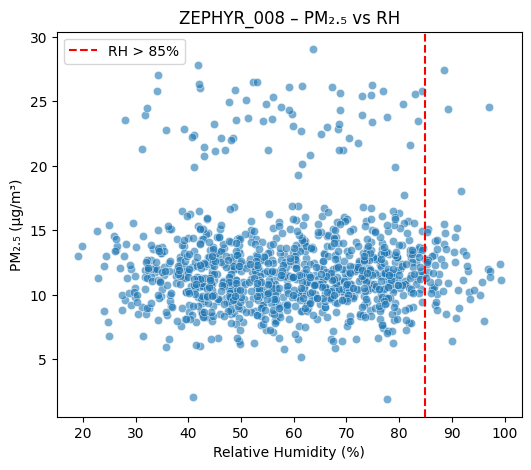

In [21]:
def pm25_vs_humidity(sensor_id):
    group = df_valid[df_valid["sensor_id"] == sensor_id]
    plt.figure(figsize=(6,5))
    sns.scatterplot(x="rh_pct", y="pm25_ugm3", data=group, alpha=0.6)
    plt.axvline(85, color="red", linestyle="--", label="RH > 85%")
    plt.title(f"{sensor_id} – PM₂.₅ vs RH")
    plt.xlabel("Relative Humidity (%)")
    plt.ylabel("PM₂.₅ (µg/m³)")
    plt.legend()
    plt.show()

pm25_vs_humidity("ZEPHYR_008")


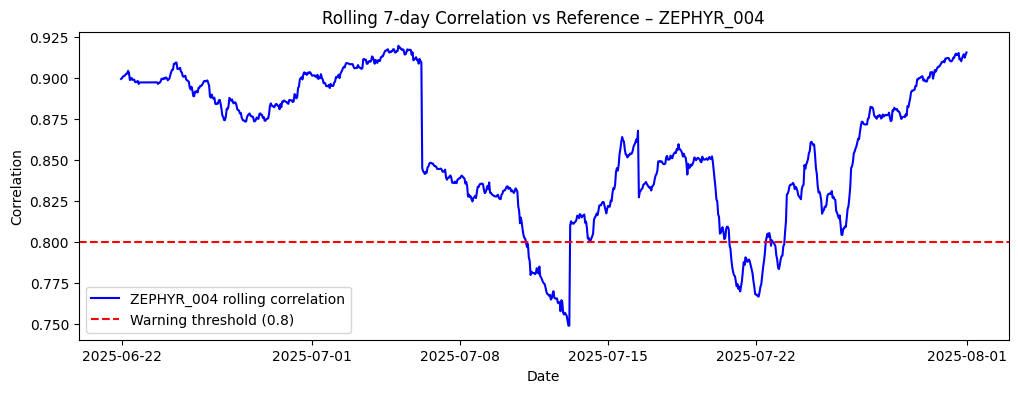

ZEPHYR_004 correlation with reference:
June: 0.897
July: 0.638


In [ ]:
# Pick sensor
sensor = "ZEPHYR_004"

# Filter sensor data only
df_sensor = df_valid[df_valid["sensor_id"] == sensor].copy()

# Set timestamp index
df_sensor = df_sensor.set_index("timestamp_recorded_utc")

# Reference series (ensure same index)
ref_series = df_valid[["timestamp_recorded_utc", "ref_no2_ppb"]].drop_duplicates("timestamp_recorded_utc")
ref_series = ref_series.set_index("timestamp_recorded_utc")["ref_no2_ppb"]

# Join sensor + reference
aligned = pd.concat([df_sensor["no2_ppb"], ref_series], axis=1, keys=[sensor, "Reference"]).dropna()

# Rolling correlation (7-day = 168 hours)
rolling_corr = aligned[sensor].rolling(168).corr(aligned["Reference"])

# Plot rolling correlation
plt.figure(figsize=(12,4))
plt.plot(rolling_corr.index, rolling_corr, label=f"{sensor} rolling correlation", color="blue")
plt.axhline(0.8, color="red", linestyle="--", label="Warning threshold (0.8)")
plt.title(f"Rolling 7-day Correlation vs Reference – {sensor}")
plt.ylabel("Correlation")
plt.xlabel("Date")
plt.legend()
plt.show()

# Compare June vs July correlation
june = aligned.loc["2025-06-15":"2025-06-30"]
july = aligned.loc["2025-07-01":"2025-07-31"]

corr_june = june[sensor].corr(june["Reference"])
corr_july = july[sensor].corr(july["Reference"])

print(f"{sensor} correlation with reference:")
print(f"June: {corr_june:.3f}")
print(f"July: {corr_july:.3f}")


In [27]:
# Function to compute correlation per sensor in two periods
def compare_correlation(df, sensor_list, start_june="2025-06-15", end_june="2025-06-30",
                        start_july="2025-07-01", end_july="2025-07-31"):
    results = []

    for sensor in sensor_list:
        # Filter one sensor
        df_sensor = df[df["sensor_id"] == sensor].copy()
        df_sensor = df_sensor.set_index("timestamp_recorded_utc")

        # Reference (unique timestamps)
        ref_series = df[["timestamp_recorded_utc", "ref_no2_ppb"]].drop_duplicates("timestamp_recorded_utc")
        ref_series = ref_series.set_index("timestamp_recorded_utc")["ref_no2_ppb"]

        # Align sensor + reference
        aligned = pd.concat([df_sensor["no2_ppb"], ref_series], axis=1, keys=[sensor, "Reference"]).dropna()

        # Split into June and July
        june = aligned.loc[start_june:end_june]
        july = aligned.loc[start_july:end_july]

        # Correlations
        corr_june = june[sensor].corr(june["Reference"])
        corr_july = july[sensor].corr(july["Reference"])

        results.append({
            "sensor_id": sensor,
            "corr_june": round(corr_june, 3) if pd.notnull(corr_june) else None,
            "corr_july": round(corr_july, 3) if pd.notnull(corr_july) else None,
            "change": round(corr_july - corr_june, 3) if pd.notnull(corr_july) and pd.notnull(corr_june) else None
        })

    return pd.DataFrame(results)

# Run for all sensors
sensor_list = df_valid["sensor_id"].unique()
corr_summary = compare_correlation(df_valid, sensor_list)

corr_summary.sort_values("change")


,sensor_id,corr_june,corr_july,change
4,ZEPHYR_005,0.888,0.620,-0.268
0,ZEPHYR_001,0.891,0.628,-0.262
3,ZEPHYR_004,0.897,0.638,-0.259
10,ZEPHYR_011,0.881,0.722,-0.159
8,ZEPHYR_009,0.892,0.793,-0.099
6,ZEPHYR_007,0.891,0.812,-0.079
18,ZEPHYR_019,0.894,0.829,-0.066
7,ZEPHYR_008,0.875,0.828,-0.047
19,ZEPHYR_020,0.885,0.851,-0.034
12,ZEPHYR_013,0.857,0.827,-0.029


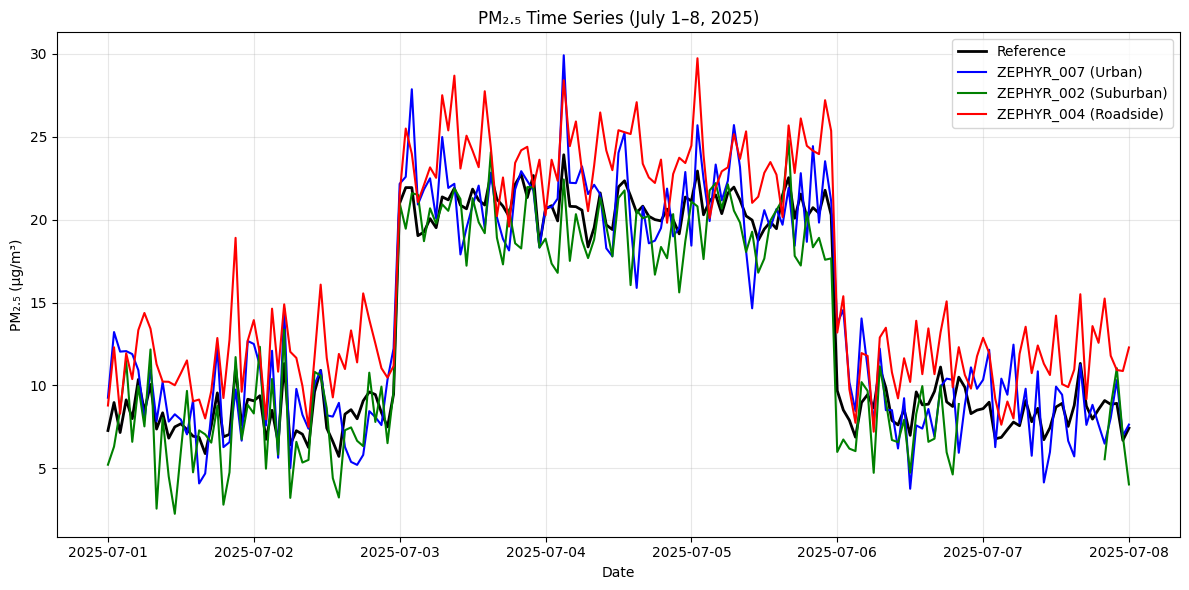

In [ ]:

# --- Select event window ---
event_start = "2025-07-01"
event_end   = "2025-07-08"

df_event = df_valid.loc[
    (df_valid["timestamp_recorded_utc"] >= event_start) &
    (df_valid["timestamp_recorded_utc"] <= event_end)
]

# --- Pick one sensor from each siting class (based on metadata) ---
sensor_urban = "ZEPHYR_007"      # Urban Background
sensor_suburban = "ZEPHYR_002"   # Suburban
sensor_roadside = "ZEPHYR_004"   # Roadside

# --- Filter and pivot for plotting ---
plot_data = df_event.pivot(index="timestamp_recorded_utc", columns="sensor_id", values="pm25_ugm3")

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_event["timestamp_recorded_utc"].unique(), 
         df_event.groupby("timestamp_recorded_utc")["ref_pm25_ugm3"].mean(), 
         label="Reference", color="black", linewidth=2)

plt.plot(plot_data.index, plot_data[sensor_urban], label=f"{sensor_urban} (Urban)", color="blue")
plt.plot(plot_data.index, plot_data[sensor_suburban], label=f"{sensor_suburban} (Suburban)", color="green")
plt.plot(plot_data.index, plot_data[sensor_roadside], label=f"{sensor_roadside} (Roadside)", color="red")

plt.title("PM₂.₅ Time Series (July 1–8, 2025)")
plt.ylabel("PM₂.₅ (µg/m³)")
plt.xlabel("Date")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


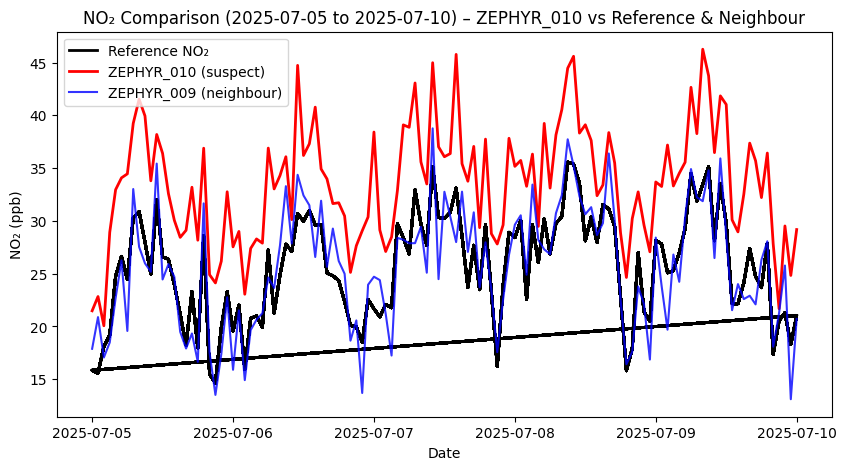

In [20]:
# Choose a narrower window (e.g., July 5–10)
start = "2025-07-05"
end   = "2025-07-10"

# Subset for time range
df_zoom = df_valid[(df_valid["timestamp_recorded_utc"] >= start) & 
                   (df_valid["timestamp_recorded_utc"] <= end)]

# Subset for relevant sensors
sensors_to_plot = ["ZEPHYR_010", "ZEPHYR_009"]
df_sus_zoom = df_zoom[df_zoom["sensor_id"].isin(sensors_to_plot)]

plt.figure(figsize=(10,5))

# Reference (black, bold)
plt.plot(df_zoom["timestamp_recorded_utc"], df_zoom["ref_no2_ppb"], 
         label="Reference NO₂", color="black", linewidth=2)

# Suspect sensor (red, bold)
plt.plot(df_sus_zoom[df_sus_zoom["sensor_id"] == "ZEPHYR_010"]["timestamp_recorded_utc"], 
         df_sus_zoom[df_sus_zoom["sensor_id"] == "ZEPHYR_010"]["no2_ppb"], 
         label="ZEPHYR_010 (suspect)", color="red", linewidth=2)

# Neighbour (blue, lighter)
plt.plot(df_sus_zoom[df_sus_zoom["sensor_id"] == "ZEPHYR_009"]["timestamp_recorded_utc"], 
         df_sus_zoom[df_sus_zoom["sensor_id"] == "ZEPHYR_009"]["no2_ppb"], 
         label="ZEPHYR_009 (neighbour)", color="blue", alpha=0.8)

plt.title(f"NO₂ Comparison ({start} to {end}) – ZEPHYR_010 vs Reference & Neighbour")
plt.xlabel("Date")
plt.ylabel("NO₂ (ppb)")
plt.legend()
plt.show()


In [21]:
# Choose sensor
suspect = "ZEPHYR_010"

# Split into training and testing windows
train_start, train_end = "2025-06-15", "2025-07-09"
test_start,  test_end  = "2025-07-10", "2025-07-31"

train = df_valid[(df_valid["sensor_id"] == suspect) &
                 (df_valid["timestamp_recorded_utc"] >= train_start) &
                 (df_valid["timestamp_recorded_utc"] <= train_end)]

test = df_valid[(df_valid["sensor_id"] == suspect) &
                (df_valid["timestamp_recorded_utc"] >= test_start) &
                (df_valid["timestamp_recorded_utc"] <= test_end)]

print("Training size:", train.shape, "Testing size:", test.shape)


Training size: (577, 24) Testing size: (505, 24)


In [22]:
bias_train = (train["no2_ppb"] - train["ref_no2_ppb"]).mean()
print("Estimated training bias (ppb):", bias_train)


Estimated training bias (ppb): 8.116054054054054


In [23]:
test = test.copy()
test["no2_ppb_corrected"] = test["no2_ppb"] - bias_train


In [ ]:

# Before correction
r2_before = r2_score(test["ref_no2_ppb"], test["no2_ppb"])
bias_before = (test["no2_ppb"] - test["ref_no2_ppb"]).mean()
rmse_before = np.sqrt(mean_squared_error(test["ref_no2_ppb"], test["no2_ppb"]))

# After correction
r2_after = r2_score(test["ref_no2_ppb"], test["no2_ppb_corrected"])
bias_after = (test["no2_ppb_corrected"] - test["ref_no2_ppb"]).mean()
rmse_after = np.sqrt(mean_squared_error(test["ref_no2_ppb"], test["no2_ppb_corrected"]))

print("Before correction → R²:", round(r2_before,3), "Bias:", round(bias_before,2), "RMSE:", round(rmse_before,2))
print("After  correction → R²:", round(r2_after,3), "Bias:", round(bias_after,2), "RMSE:", round(rmse_after,2))


Before correction → R²: -1.682 Bias: 8.07 RMSE: 8.45
After  correction → R²: 0.765 Bias: -0.05 RMSE: 2.5


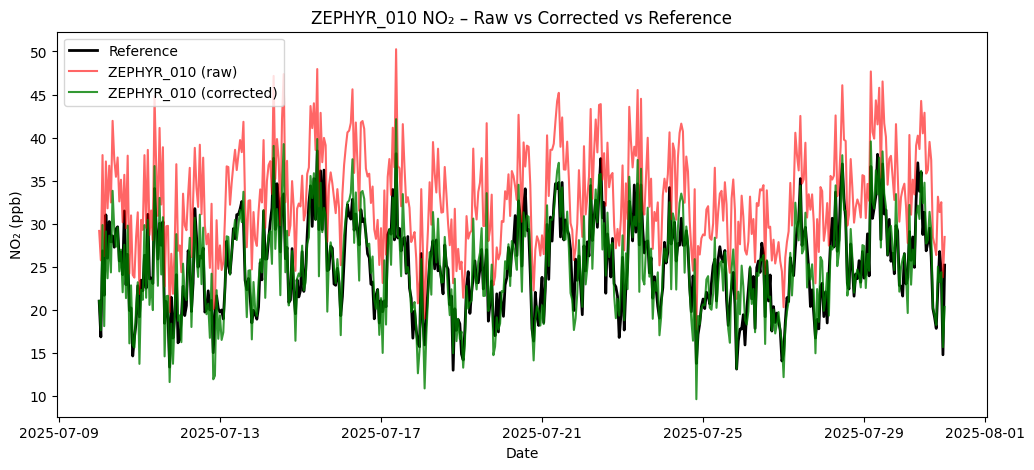

In [ ]:

plt.figure(figsize=(12,5))
plt.plot(test["timestamp_recorded_utc"], test["ref_no2_ppb"], label="Reference", color="black", linewidth=2)
plt.plot(test["timestamp_recorded_utc"], test["no2_ppb"], label="ZEPHYR_010 (raw)", color="red", alpha=0.6)
plt.plot(test["timestamp_recorded_utc"], test["no2_ppb_corrected"], label="ZEPHYR_010 (corrected)", color="green", alpha=0.8)
plt.title("ZEPHYR_010 NO₂ – Raw vs Corrected vs Reference")
plt.xlabel("Date")
plt.ylabel("NO₂ (ppb)")
plt.legend()
plt.show()


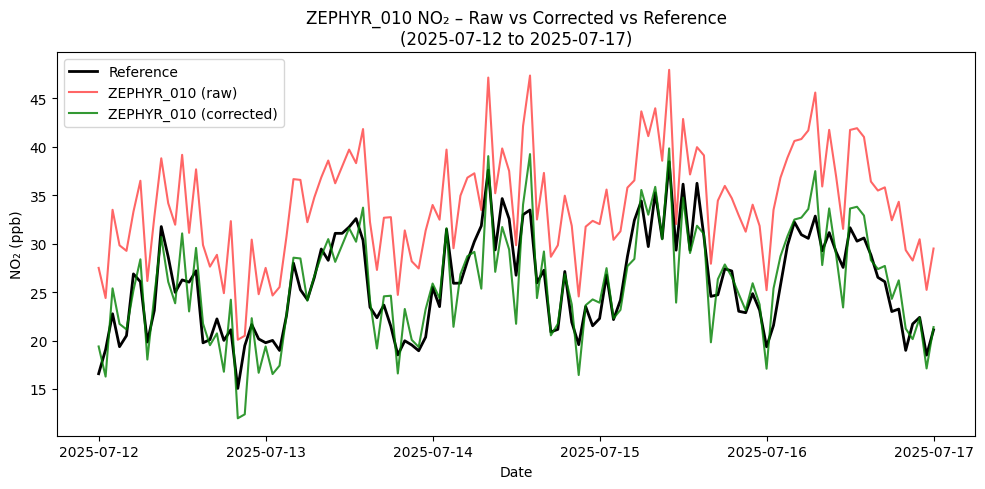

In [27]:
# Pick a smaller time window inside the test period
plot_start, plot_end = "2025-07-12", "2025-07-17"

mask = (test["timestamp_recorded_utc"] >= plot_start) & (test["timestamp_recorded_utc"] <= plot_end)
test_zoom = test.loc[mask]

plt.figure(figsize=(10,5))

plt.plot(test_zoom["timestamp_recorded_utc"], test_zoom["ref_no2_ppb"],
         label="Reference", color="black", linewidth=2)

plt.plot(test_zoom["timestamp_recorded_utc"], test_zoom["no2_ppb"],
         label="ZEPHYR_010 (raw)", color="red", alpha=0.6)

plt.plot(test_zoom["timestamp_recorded_utc"], test_zoom["no2_ppb_corrected"],
         label="ZEPHYR_010 (corrected)", color="green", alpha=0.8)

plt.title(f"ZEPHYR_010 NO₂ – Raw vs Corrected vs Reference\n({plot_start} to {plot_end})")
plt.xlabel("Date")
plt.ylabel("NO₂ (ppb)")
plt.legend()
plt.tight_layout()
plt.show()


## Stretch (optional)

In [31]:

# Step 1: Define RH bands
def rh_band(rh):
    if rh < 50:
        return "Low (<50%)"
    elif rh < 70:
        return "Medium (50–70%)"
    else:
        return "High (>70%)"

df_valid["rh_band"] = df_valid["rh_pct"].apply(rh_band)

# Step 2: Compute PM2.5 bias (sensor - reference)
df_valid["bias_pm25"] = df_valid["pm25_ugm3"] - df_valid["ref_pm25_ugm3"]

# Step 3: Group by sensor and RH band
bias_table = (
    df_valid.groupby(["sensor_id", "rh_band"])["bias_pm25"]
    .mean()
    .reset_index()
)

# Step 4: Check dimensions
print(len(bias_table))   # Expect 20 sensors × 3 bands = 60 rows
print(bias_table.head(10))   # Preview first rows
print(bias_table.tail(10))   # Preview last rows



60
    sensor_id          rh_band  bias_pm25
0  ZEPHYR_001      High (>70%)  -0.137647
1  ZEPHYR_001       Low (<50%)   0.179809
2  ZEPHYR_001  Medium (50–70%)   0.102030
3  ZEPHYR_002      High (>70%)  -1.059534
4  ZEPHYR_002       Low (<50%)  -1.152083
5  ZEPHYR_002  Medium (50–70%)  -1.048284
6  ZEPHYR_003      High (>70%)   1.360952
7  ZEPHYR_003       Low (<50%)  -1.102782
8  ZEPHYR_003  Medium (50–70%)  -0.536530
9  ZEPHYR_004      High (>70%)   3.102328
     sensor_id          rh_band  bias_pm25
50  ZEPHYR_017  Medium (50–70%)   0.000377
51  ZEPHYR_018      High (>70%)   0.080643
52  ZEPHYR_018       Low (<50%)  -0.012089
53  ZEPHYR_018  Medium (50–70%)  -0.036856
54  ZEPHYR_019      High (>70%)   3.150513
55  ZEPHYR_019       Low (<50%)   3.149505
56  ZEPHYR_019  Medium (50–70%)   2.906361
57  ZEPHYR_020      High (>70%)   3.153665
58  ZEPHYR_020       Low (<50%)   2.912161
59  ZEPHYR_020  Medium (50–70%)   2.980176


In [32]:
print(len(bias_table))


60


In [33]:
bias_pivot = bias_table.pivot(index="sensor_id", columns="rh_band", values="bias_pm25")
bias_pivot = bias_pivot.reset_index()
bias_pivot.columns.name = None  # remove extra label

bias_pivot.head(10)   # preview


,sensor_id,High (>70%),Low (<50%),Medium (50–70%)
0,ZEPHYR_001,-0.137647,0.179809,0.102030
1,ZEPHYR_002,-1.059534,-1.152083,-1.048284
2,ZEPHYR_003,1.360952,-1.102782,-0.536530
3,ZEPHYR_004,3.102328,3.057250,3.031696
4,ZEPHYR_005,-1.005014,-0.988033,-0.902376
5,ZEPHYR_006,1.301503,-0.812582,-0.658122
6,ZEPHYR_007,2.025058,-0.166585,0.259296
7,ZEPHYR_008,2.971009,2.940703,2.821078
8,ZEPHYR_009,0.063410,-0.180882,-0.256284
9,ZEPHYR_010,2.935221,3.034022,2.847252


/var/folders/5v/dwldmj5j4rz_h28s452wddp80000gn/T/ipykernel_75540/3259747919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


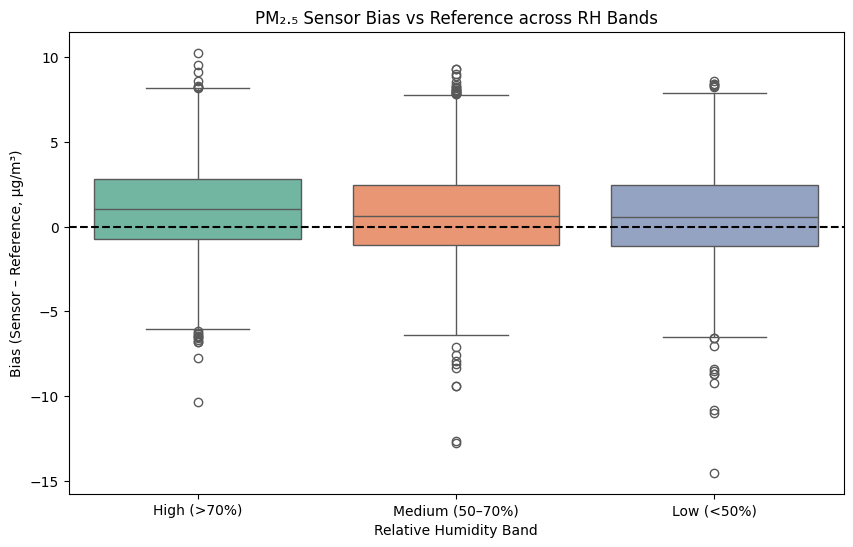

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(
    x="rh_band",
    y="bias_pm25",
    data=df_valid,
    palette="Set2"
)

plt.axhline(0, color="black", linestyle="--")
plt.title("PM₂.₅ Sensor Bias vs Reference across RH Bands")
plt.xlabel("Relative Humidity Band")
plt.ylabel("Bias (Sensor – Reference, µg/m³)")
plt.show()


/var/folders/5v/dwldmj5j4rz_h28s452wddp80000gn/T/ipykernel_75540/35636293.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="rh_band", y=(df_valid["pm25_ugm3"] - df_valid["ref_pm25_ugm3"]),


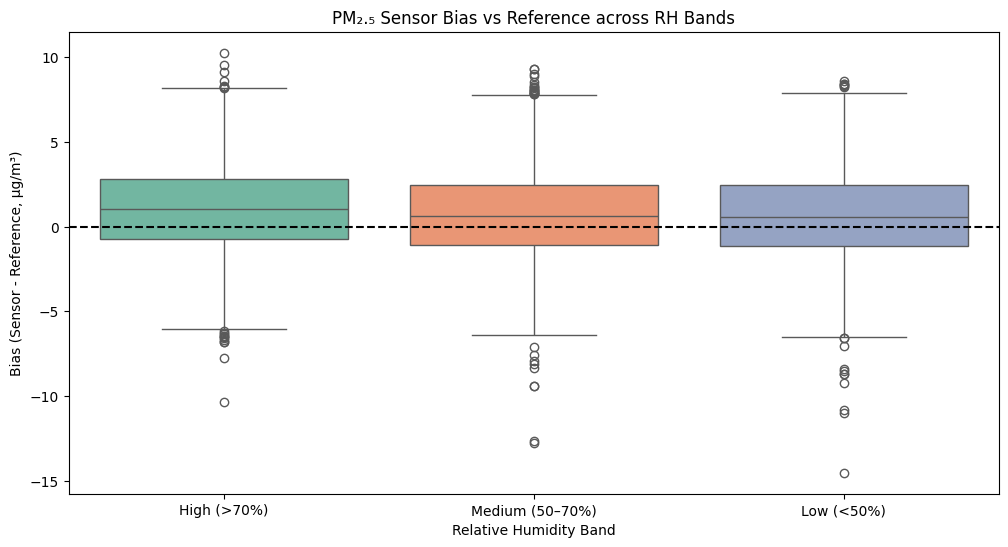

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="rh_band", y=(df_valid["pm25_ugm3"] - df_valid["ref_pm25_ugm3"]), 
            data=df_valid, palette="Set2")
plt.axhline(0, color="black", linestyle="--")
plt.title("PM₂.₅ Sensor Bias vs Reference across RH Bands")
plt.ylabel("Bias (Sensor - Reference, µg/m³)")
plt.xlabel("Relative Humidity Band")
plt.show()


In [35]:
sensor = "ZEPHYR_004"
df_sensor = df_valid[df_valid["sensor_id"] == sensor].copy()

# Residuals
df_sensor["no2_residual"] = df_sensor["no2_ppb"] - df_sensor["ref_no2_ppb"]

# Rolling 7-day mean (168 hours)
df_sensor["resid_roll7d"] = df_sensor["no2_residual"].rolling(window=168, min_periods=24).mean()

# Alert threshold ±5 ppb
threshold = 5
df_sensor["drift_alert"] = df_sensor["resid_roll7d"].abs() > threshold

df_sensor[["timestamp_recorded_utc", "no2_residual", "resid_roll7d", "drift_alert"]].head(20)


,timestamp_recorded_utc,no2_residual,resid_roll7d,drift_alert
3384,2025-06-15 00:00:00+00:00,7.05,NaN,False
3385,2025-06-15 01:00:00+00:00,11.19,NaN,False
3386,2025-06-15 02:00:00+00:00,6.65,NaN,False
3387,2025-06-15 03:00:00+00:00,9.67,NaN,False
3388,2025-06-15 04:00:00+00:00,11.46,NaN,False
3389,2025-06-15 05:00:00+00:00,6.43,NaN,False
3390,2025-06-15 06:00:00+00:00,7.88,NaN,False
3391,2025-06-15 07:00:00+00:00,12.32,NaN,False
3392,2025-06-15 08:00:00+00:00,8.57,NaN,False
3393,2025-06-15 09:00:00+00:00,8.93,NaN,False


In [37]:
df_sensor[df_sensor["drift_alert"]].head()


,sensor_id,timestamp_recorded_utc,no2_ppb,no2_ugm3,pm25_ugm3,temp_c,rh_pct,flag_out_of_range__no2_ppb,flag_out_of_range__no2_ugm3,flag_out_of_range__pm25_ugm3,...,ref_no2_ppb,ref_pm25_ugm3,ref_temp_c,ref_rh_pct,ref_no2_ugm3,rh_band,bias_pm25,no2_residual,resid_roll7d,drift_alert
3407,ZEPHYR_004,2025-06-15 23:00:00+00:00,34.17,67.16,10.56,12.08,67.82,0.0,0.0,0.0,...,23.30,8.23,11.72,69.60,45.86,Medium (50–70%),2.33,10.87,8.070417,True
3408,ZEPHYR_004,2025-06-16 00:00:00+00:00,31.06,60.51,13.09,14.64,78.66,0.0,0.0,0.0,...,25.32,9.23,13.31,84.82,49.56,High (>70%),3.86,5.74,7.977200,True
3409,ZEPHYR_004,2025-06-16 01:00:00+00:00,28.02,55.36,10.78,10.60,79.09,0.0,0.0,0.0,...,22.76,8.52,11.82,79.83,44.78,High (>70%),2.26,5.26,7.872692,True
3410,ZEPHYR_004,2025-06-16 02:00:00+00:00,31.07,61.57,12.56,9.79,81.99,0.0,0.0,0.0,...,18.19,8.74,10.26,86.34,35.98,High (>70%),3.82,12.88,8.058148,True
3411,ZEPHYR_004,2025-06-16 03:00:00+00:00,35.50,69.99,13.16,11.21,76.20,0.0,0.0,0.0,...,27.52,9.31,11.16,75.96,54.27,High (>70%),3.85,7.98,8.055357,True


In [39]:
# Create summary table
drift_summary = pd.DataFrame(results)

# Show the summary in your notebook
print(drift_summary)

# Or nicer formatting
drift_summary.head(20)   # show all sensors if <=20


     sensor_id drift_start_date  max_residual_ppb          status
0   ZEPHYR_001       2025-07-23             13.29  Drift detected
1   ZEPHYR_002             None             -1.16          Stable
2   ZEPHYR_003             None             -1.30          Stable
3   ZEPHYR_004       2025-06-18             21.80  Drift detected
4   ZEPHYR_005       2025-07-25             11.62  Drift detected
5   ZEPHYR_006             None             -0.85          Stable
6   ZEPHYR_007             None              4.35          Stable
7   ZEPHYR_008       2025-06-18             12.20  Drift detected
8   ZEPHYR_009             None              4.38          Stable
9   ZEPHYR_010       2025-06-18              8.63  Drift detected
10  ZEPHYR_011       2025-06-18             17.13  Drift detected
11  ZEPHYR_012       2025-06-18              8.51  Drift detected
12  ZEPHYR_013             None              2.29          Stable
13  ZEPHYR_014             None              0.41          Stable
14  ZEPHYR

,sensor_id,drift_start_date,max_residual_ppb,status
0,ZEPHYR_001,2025-07-23,13.29,Drift detected
1,ZEPHYR_002,None,-1.16,Stable
2,ZEPHYR_003,None,-1.30,Stable
3,ZEPHYR_004,2025-06-18,21.80,Drift detected
4,ZEPHYR_005,2025-07-25,11.62,Drift detected
5,ZEPHYR_006,None,-0.85,Stable
6,ZEPHYR_007,None,4.35,Stable
7,ZEPHYR_008,2025-06-18,12.20,Drift detected
8,ZEPHYR_009,None,4.38,Stable
9,ZEPHYR_010,2025-06-18,8.63,Drift detected


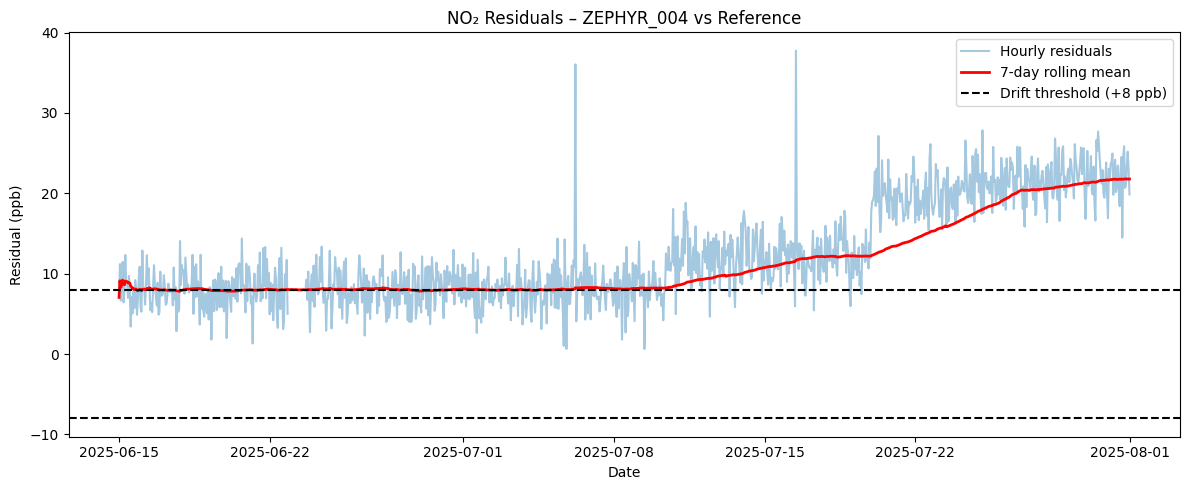

In [ ]:
# Select one sensor with detected drift
sensor = "ZEPHYR_004"
df_sensor = df_valid[df_valid["sensor_id"] == sensor].copy()

# Calculate residuals (NO2)
df_sensor["no2_residual"] = df_sensor["no2_ppb"] - df_sensor["ref_no2_ppb"]

# Rolling 7-day average residuals
df_sensor["resid_roll7d"] = df_sensor["no2_residual"].rolling(window=24*7, min_periods=1).mean()

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_sensor["timestamp_recorded_utc"], df_sensor["no2_residual"], 
         alpha=0.4, label="Hourly residuals")
plt.plot(df_sensor["timestamp_recorded_utc"], df_sensor["resid_roll7d"], 
         color="red", linewidth=2, label="7-day rolling mean")
plt.axhline(8, color="black", linestyle="--", label="Drift threshold (+8 ppb)")
plt.axhline(-8, color="black", linestyle="--")
plt.title(f"NO₂ Residuals – {sensor} vs Reference")
plt.xlabel("Date")
plt.ylabel("Residual (ppb)")
plt.legend()
plt.tight_layout()
plt.show()
